In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
modelAfinname = '2018-01-31SampleCustomStats_thresh0.35_Ncomp16_sumNDgt0_seed20.txt'
modelBfinname = '2018-02-14modelBCustomStats_thresh0.35.txt'
modelCfinname = '2018-02-14modelCCustomStats_thresh0.35.txt'

In [3]:
modelAtable = pd.read_table(modelAfinname, header=None, sep =' ')
modelBtable = pd.read_table(modelBfinname, header=None, sep =' ')
modelCtable = pd.read_table(modelCfinname, header=None, sep =' ')

In [4]:
UN_DSplus_cut = np.load('2018-02-13UN_DSplus_cut.npy')
UR_DSplus_cut = np.load('2018-02-13UR_DSplus_cut.npy')
PR_DSplus_cut = np.load('2018-02-13PR_DSplus_cut.npy')
MR_DSplus_cut = np.load('2018-02-13MR_DSplus_cut.npy')
MN_DSplus_cut = np.load('2018-02-13MN_DSplus_cut.npy')


produce versions of the cuts for the specific models

In [5]:

modelB_URcut = np.zeros(len(UR_DSplus_cut))
modelB_URcut[UR_DSplus_cut] += 1
modelB_URcut = modelB_URcut[UN_DSplus_cut + UR_DSplus_cut]
modelB_URcut = modelB_URcut.astype(bool)

In [6]:

modelC_PRcut = np.zeros(len(PR_DSplus_cut))
modelC_PRcut[PR_DSplus_cut] += 1
modelC_PRcut = modelC_PRcut[UN_DSplus_cut + PR_DSplus_cut]
modelC_PRcut = modelC_PRcut.astype(bool)

In [7]:
np.sum(modelC_PRcut)

108

In [8]:
np.sum(modelB_URcut)

108

# UR F1 in model A vs model B 

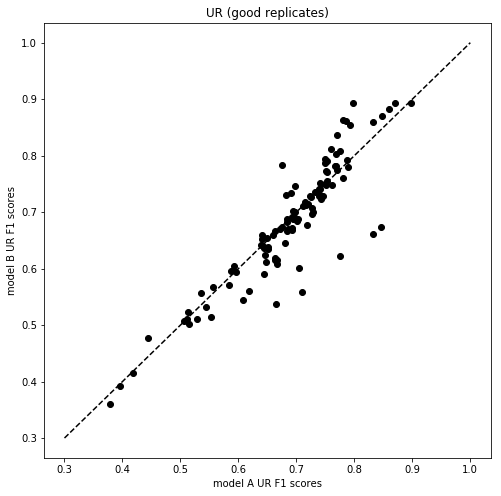

In [9]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelAtable[9].values[UR_DSplus_cut], modelBtable[9].values[modelB_URcut], 'ok')
plt.xlabel('model A UR F1 scores')
plt.ylabel('model B UR F1 scores')
plt.title('UR (good replicates)')
plt.plot([0.3,1], [0.3,1], '--k')
plt.show()

In [10]:
np.mean(modelAtable[9].values[UR_DSplus_cut])

0.68948099616395742

In [11]:
np.mean(modelBtable[9].values[modelB_URcut])

0.68357944199103216

# PR F1 in model A vs model C

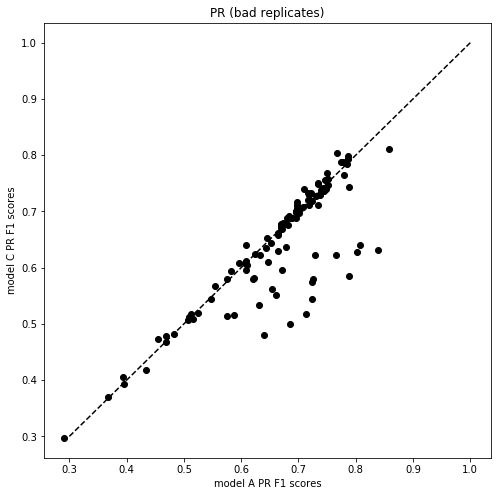

In [12]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelAtable[9].values[PR_DSplus_cut], modelCtable[9].values[modelC_PRcut], 'ok')
plt.xlabel('model A PR F1 scores')
plt.ylabel('model C PR F1 scores')
plt.title('PR (bad replicates)')
plt.plot([0.3,1], [0.3,1], '--k')
plt.show()

In [13]:
np.mean( modelCtable[9].values[modelC_PRcut])

0.64098960325695054

In [14]:
np.mean(modelAtable[9].values[PR_DSplus_cut])

0.66467071957113033

# UN F1 in model A vs model B 

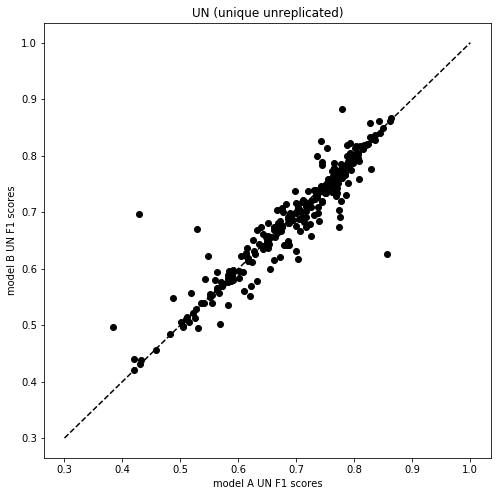

In [15]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelAtable[9].values[UN_DSplus_cut], modelBtable[9].values[~modelB_URcut], 'ok')
plt.xlabel('model A UN F1 scores')
plt.ylabel('model B UN F1 scores')
plt.title('UN (unique unreplicated)')
plt.plot([0.3,1], [0.3,1], '--k')
plt.show()

In [16]:
np.mean(modelAtable[9].values[UN_DSplus_cut],)

0.70090431577051737

In [17]:
np.mean(modelBtable[9].values[~modelB_URcut])

0.69727501252276491

# UN F1 in model A vs model C 

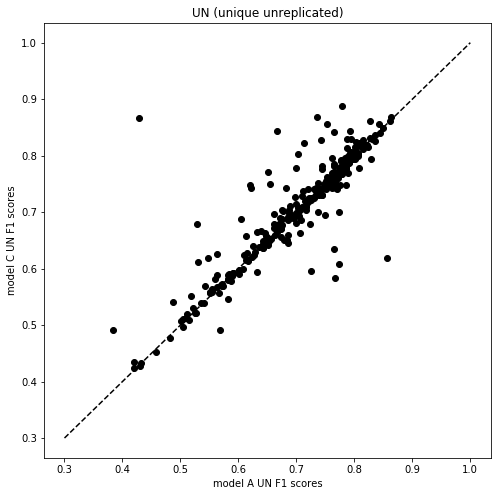

In [18]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelAtable[9].values[UN_DSplus_cut], modelCtable[9].values[~modelC_PRcut], 'ok')
plt.xlabel('model A UN F1 scores')
plt.ylabel('model C UN F1 scores')
plt.title('UN (unique unreplicated)')
plt.plot([0.3,1], [0.3,1], '--k')
plt.show()

In [19]:
np.mean(modelAtable[9].values[UN_DSplus_cut])

0.70090431577051737

In [20]:
np.mean(modelCtable[9].values[~modelC_PRcut])

0.70709160350180245

# now lets have some fun with other metadata stuff

In [21]:
SelectMD = pd.read_csv('Select_MetaTable_rosettad.csv')

In [22]:
SelectMD.shape

(644, 5)

In [23]:
SelectMD.head()

,DS_plus,SPOT1,SPOT2,SPOT2_num_spots,number unique hotspots
0,DS18406,0.4896,0.4109,255884.0,565
1,DS18590,0.5350,0.5024,227485.0,4414
2,DS18692,0.5381,0.5130,277077.0,1851
3,DS20753,0.2915,0.1825,72168.0,102
4,DS20827,0.3028,0.1994,76068.0,178


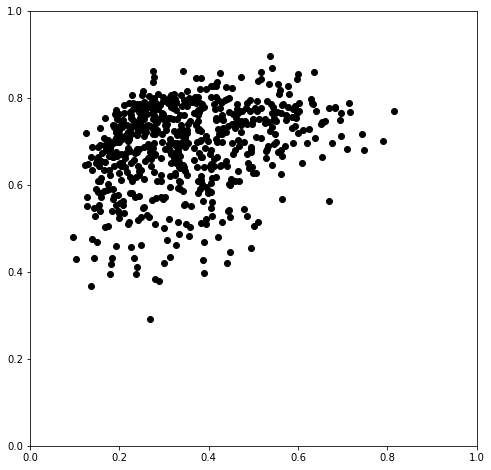

In [24]:
plt.clf()
plt.figure(figsize=(8,8))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(SelectMD['SPOT2'].values, modelAtable[9].values, 'ok' )
plt.show()

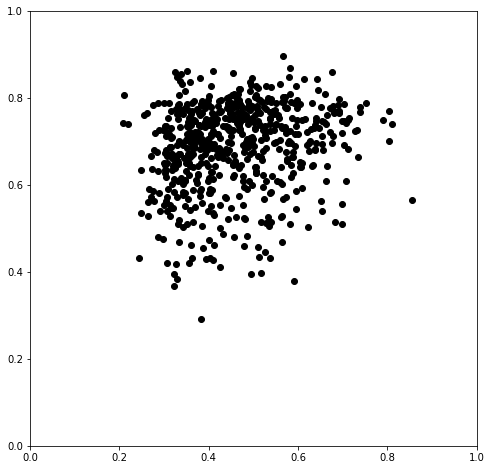

In [25]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(SelectMD['SPOT1'].values, modelAtable[9].values, 'ok' )
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

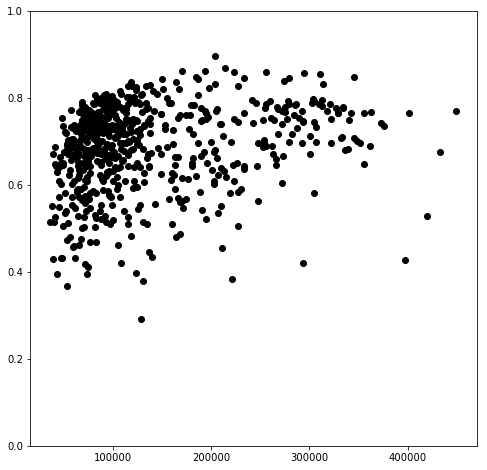

In [26]:
plt.clf()
plt.figure(figsize=(8,8))
plt.ylim(0,1)
plt.plot(SelectMD['SPOT2_num_spots'].values, modelAtable[9].values, 'ok' )
plt.show()

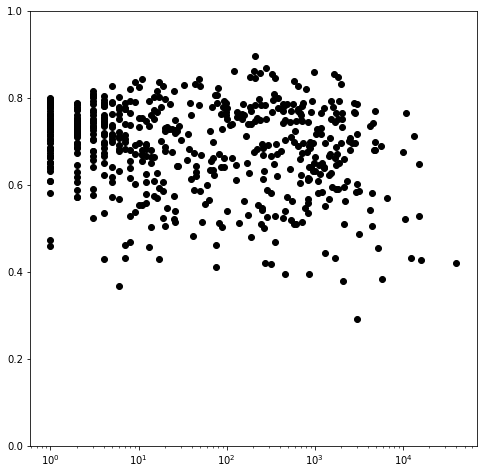

In [27]:
plt.clf()
plt.figure(figsize=(8,8))
plt.ylim(0,1)
plt.plot(SelectMD['number unique hotspots'].values, modelAtable[9].values, 'ok' )
plt.xscale('log')
plt.show()

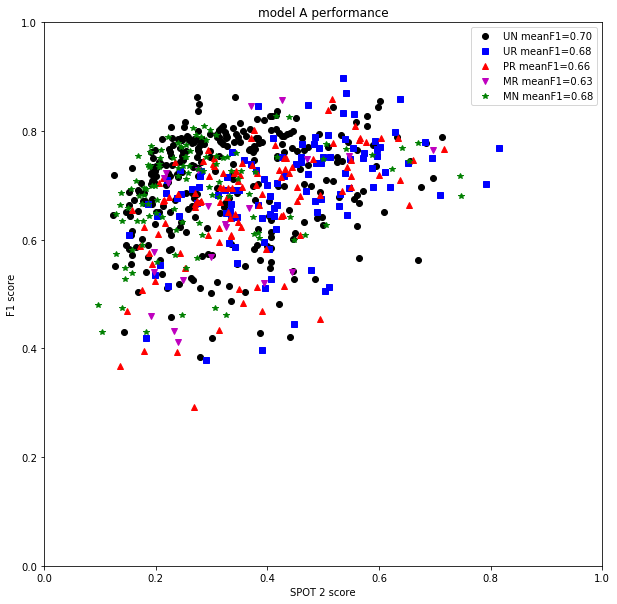

In [28]:
plt.clf()
plt.figure(figsize=(10,10))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(SelectMD['SPOT2'].values[UN_DSplus_cut], modelAtable[9].values[UN_DSplus_cut], 'ok' )
plt.plot(SelectMD['SPOT2'].values[UR_DSplus_cut], modelAtable[9].values[UR_DSplus_cut], 'sb' )
plt.plot(SelectMD['SPOT2'].values[PR_DSplus_cut], modelAtable[9].values[PR_DSplus_cut], '^r' )
plt.plot(SelectMD['SPOT2'].values[MR_DSplus_cut], modelAtable[9].values[MR_DSplus_cut], 'vm' )
plt.plot(SelectMD['SPOT2'].values[MN_DSplus_cut], modelAtable[9].values[MN_DSplus_cut], '*g' )
UNmeanF1 = np.mean(modelAtable[9].values[UN_DSplus_cut])
URmeanF1 = np.mean(modelAtable[9].values[UR_DSplus_cut])
PRmeanF1 = np.mean(modelAtable[9].values[PR_DSplus_cut])
MRmeanF1 = np.mean(modelAtable[9].values[MR_DSplus_cut])
MNmeanF1 = np.mean(modelAtable[9].values[MN_DSplus_cut])

plt.legend(['UN meanF1='+str(UNmeanF1)[0:4], 'UR meanF1='+str(URmeanF1)[0:4], 'PR meanF1='+str(PRmeanF1)[0:4], 'MR meanF1='+str(MRmeanF1)[0:4], 'MN meanF1='+str(MNmeanF1)[0:4]])
plt.xlabel('SPOT 2 score')
plt.ylabel('F1 score')
plt.title('model A performance')
plt.show()

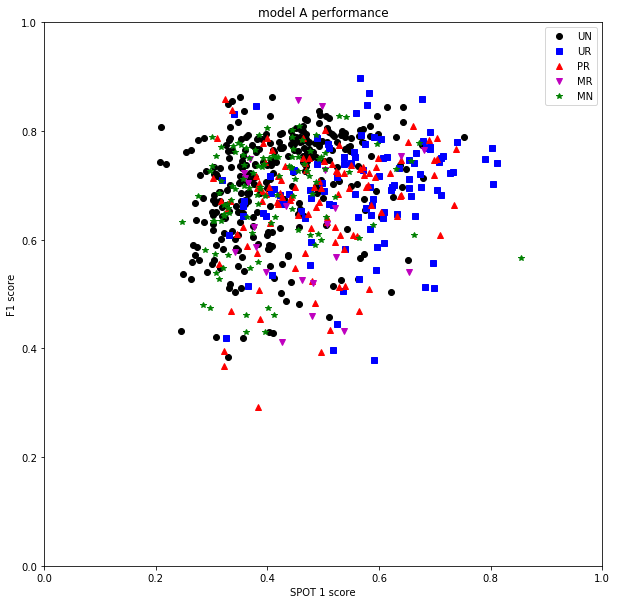

In [29]:
plt.clf()
plt.figure(figsize=(10,10))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(SelectMD['SPOT1'].values[UN_DSplus_cut], modelAtable[9].values[UN_DSplus_cut], 'ok' )
plt.plot(SelectMD['SPOT1'].values[UR_DSplus_cut], modelAtable[9].values[UR_DSplus_cut], 'sb' )
plt.plot(SelectMD['SPOT1'].values[PR_DSplus_cut], modelAtable[9].values[PR_DSplus_cut], '^r' )
plt.plot(SelectMD['SPOT1'].values[MR_DSplus_cut], modelAtable[9].values[MR_DSplus_cut], 'vm' )
plt.plot(SelectMD['SPOT1'].values[MN_DSplus_cut], modelAtable[9].values[MN_DSplus_cut], '*g' )
plt.legend(['UN', 'UR', 'PR', 'MR', 'MN'])
plt.xlabel('SPOT 1 score')
plt.ylabel('F1 score')
plt.title('model A performance')
plt.show()

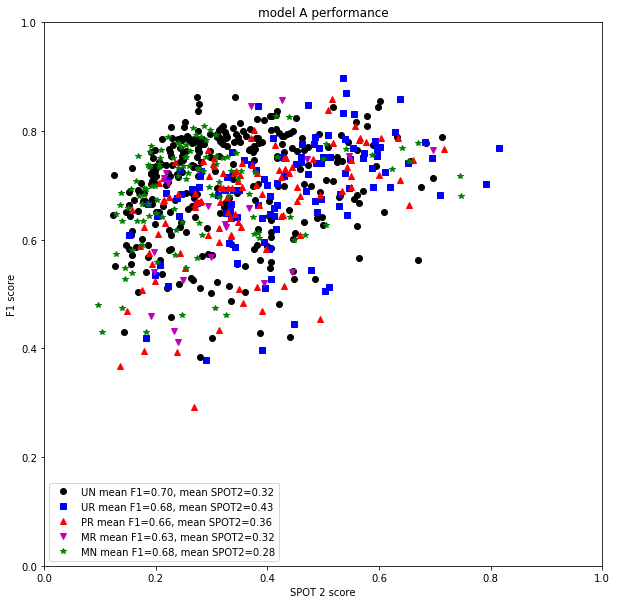

In [30]:
plt.clf()
plt.figure(figsize=(10,10))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(SelectMD['SPOT2'].values[UN_DSplus_cut], modelAtable[9].values[UN_DSplus_cut], 'ok' )
plt.plot(SelectMD['SPOT2'].values[UR_DSplus_cut], modelAtable[9].values[UR_DSplus_cut], 'sb' )
plt.plot(SelectMD['SPOT2'].values[PR_DSplus_cut], modelAtable[9].values[PR_DSplus_cut], '^r' )
plt.plot(SelectMD['SPOT2'].values[MR_DSplus_cut], modelAtable[9].values[MR_DSplus_cut], 'vm' )
plt.plot(SelectMD['SPOT2'].values[MN_DSplus_cut], modelAtable[9].values[MN_DSplus_cut], '*g' )
UNmeanF1 = np.mean(modelAtable[9].values[UN_DSplus_cut])
URmeanF1 = np.mean(modelAtable[9].values[UR_DSplus_cut])
PRmeanF1 = np.mean(modelAtable[9].values[PR_DSplus_cut])
MRmeanF1 = np.mean(modelAtable[9].values[MR_DSplus_cut])
MNmeanF1 = np.mean(modelAtable[9].values[MN_DSplus_cut])

UNmeanSPOT2 = np.nanmean(SelectMD['SPOT2'].values[UN_DSplus_cut])
URmeanSPOT2 = np.nanmean(SelectMD['SPOT2'].values[UR_DSplus_cut])
PRmeanSPOT2 = np.nanmean(SelectMD['SPOT2'].values[PR_DSplus_cut])
MRmeanSPOT2 = np.nanmean(SelectMD['SPOT2'].values[MR_DSplus_cut])
MNmeanSPOT2 = np.nanmean(SelectMD['SPOT2'].values[MN_DSplus_cut])


plt.legend(['UN mean F1='+str(UNmeanF1)[0:4]+', mean SPOT2='+str(UNmeanSPOT2)[0:4], 'UR mean F1='+str(URmeanF1)[0:4]+', mean SPOT2='+str(URmeanSPOT2)[0:4], 'PR mean F1='+str(PRmeanF1)[0:4]+', mean SPOT2='+str(PRmeanSPOT2)[0:4], 'MR mean F1='+str(MRmeanF1)[0:4]+', mean SPOT2='+str(MRmeanSPOT2)[0:4], 'MN mean F1='+str(MNmeanF1)[0:4]+', mean SPOT2='+str(MNmeanSPOT2)[0:4]])
plt.xlabel('SPOT 2 score')
plt.ylabel('F1 score')
plt.title('model A performance')
plt.show()

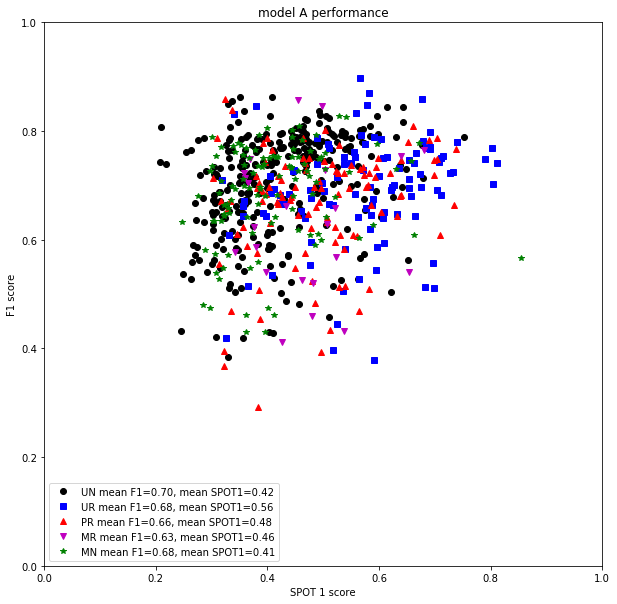

In [31]:
plt.clf()
plt.figure(figsize=(10,10))
plt.xlim(0,1)
plt.ylim(0,)1
plt.plot(SelectMD['SPOT1'].values[UN_DSplus_cut], modelAtable[9].values[UN_DSplus_cut], 'ok' )
plt.plot(SelectMD['SPOT1'].values[UR_DSplus_cut], modelAtable[9].values[UR_DSplus_cut], 'sb' )
plt.plot(SelectMD['SPOT1'].values[PR_DSplus_cut], modelAtable[9].values[PR_DSplus_cut], '^r' )
plt.plot(SelectMD['SPOT1'].values[MR_DSplus_cut], modelAtable[9].values[MR_DSplus_cut], 'vm' )
plt.plot(SelectMD['SPOT1'].values[MN_DSplus_cut], modelAtable[9].values[MN_DSplus_cut], '*g' )
UNmeanF1 = np.mean(modelAtable[9].values[UN_DSplus_cut])
URmeanF1 = np.mean(modelAtable[9].values[UR_DSplus_cut])
PRmeanF1 = np.mean(modelAtable[9].values[PR_DSplus_cut])
MRmeanF1 = np.mean(modelAtable[9].values[MR_DSplus_cut])
MNmeanF1 = np.mean(modelAtable[9].values[MN_DSplus_cut])

UNmeanSPOT1 = np.nanmean(SelectMD['SPOT1'].values[UN_DSplus_cut])
URmeanSPOT1 = np.nanmean(SelectMD['SPOT1'].values[UR_DSplus_cut])
PRmeanSPOT1 = np.nanmean(SelectMD['SPOT1'].values[PR_DSplus_cut])
MRmeanSPOT1 = np.nanmean(SelectMD['SPOT1'].values[MR_DSplus_cut])
MNmeanSPOT1 = np.nanmean(SelectMD['SPOT1'].values[MN_DSplus_cut])


plt.legend(['UN mean F1='+str(UNmeanF1)[0:4]+', mean SPOT1='+str(UNmeanSPOT1)[0:4], 'UR mean F1='+str(URmeanF1)[0:4]+', mean SPOT1='+str(URmeanSPOT1)[0:4], 'PR mean F1='+str(PRmeanF1)[0:4]+', mean SPOT1='+str(PRmeanSPOT1)[0:4], 'MR mean F1='+str(MRmeanF1)[0:4]+', mean SPOT1='+str(MRmeanSPOT1)[0:4], 'MN mean F1='+str(MNmeanF1)[0:4]+', mean SPOT1='+str(MNmeanSPOT1)[0:4]])
plt.xlabel('SPOT 1 score')
plt.ylabel('F1 score')
plt.title('model A performance')
plt.show()

In [32]:
SelectMD['SPOT2'].values[UN_DSplus_cut][0:5]

array([ 0.1825,  0.1994,  0.3253,  0.1465,  0.1652])

In [33]:
URPRPairing = np.loadtxt('GoodToBad_ReplicateMatches_ColTitleIndeces.txt').astype(int)

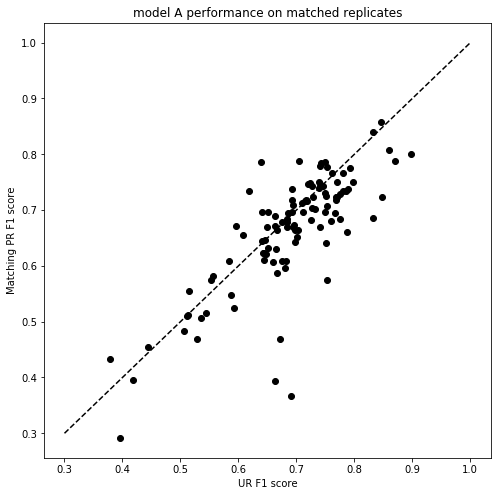

In [34]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelAtable[9].values[URPRPairing[:,1]],modelAtable[9].values[URPRPairing[:,0]], 'ok' )
plt.plot([0.3,1], [0.3,1], '--k')
plt.xlabel('UR F1 score')
plt.ylabel('Matching PR F1 score')
plt.title('model A performance on matched replicates')
plt.show()

In [35]:
np.mean(modelAtable[9].values[URPRPairing[:,0]])

0.66467071957113011

In [36]:
np.mean(modelAtable[9].values[URPRPairing[:,1]])

0.68948099616395742

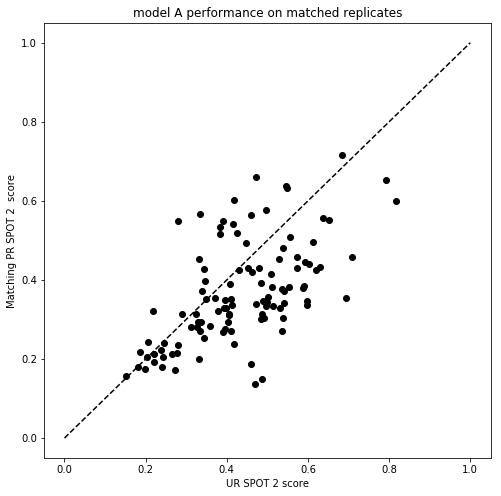

In [37]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(SelectMD['SPOT2'].values[URPRPairing[:,1]],SelectMD['SPOT2'].values[URPRPairing[:,0]], 'ok' )
plt.plot([0.0,1], [0.0,1], '--k')
plt.xlabel('UR SPOT 2 score')
plt.ylabel('Matching PR SPOT 2  score')
plt.title('model A performance on matched replicates')
plt.show()

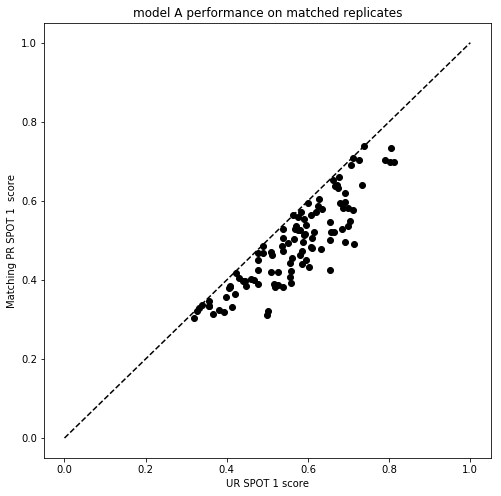

In [38]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(SelectMD['SPOT1'].values[URPRPairing[:,1]],SelectMD['SPOT1'].values[URPRPairing[:,0]], 'ok' )
plt.plot([0.0,1], [0.0,1], '--k')
plt.xlabel('UR SPOT 1 score')
plt.ylabel('Matching PR SPOT 1  score')
plt.title('model A performance on matched replicates')
plt.show()

# bringing in model D


In [39]:
modelDfinname = '2018-02-15modelDCustomStats_thresh0.35.txt'

In [40]:
modelDtable = pd.read_table(modelDfinname, header=None, sep =' ')


In [42]:
modelD_PRcut = np.zeros(len(PR_DSplus_cut))
modelD_PRcut[PR_DSplus_cut] += 1
modelD_PRcut = modelD_PRcut[UN_DSplus_cut + PR_DSplus_cut + UR_DSplus_cut]
modelD_PRcut = modelD_PRcut.astype(bool)

In [47]:
modelD_URcut = np.zeros(len(PR_DSplus_cut))
modelD_URcut[UR_DSplus_cut] += 1
modelD_URcut = modelD_URcut[UN_DSplus_cut + PR_DSplus_cut + UR_DSplus_cut]
modelD_URcut = modelD_URcut.astype(bool)

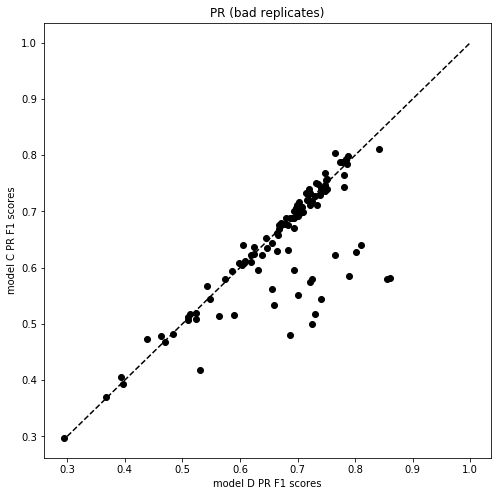

In [43]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelDtable[9].values[modelD_PRcut], modelCtable[9].values[modelC_PRcut], 'ok')
plt.xlabel('model D PR F1 scores')
plt.ylabel('model C PR F1 scores')
plt.title('PR (bad replicates)')
plt.plot([0.3,1], [0.3,1], '--k')
plt.show()

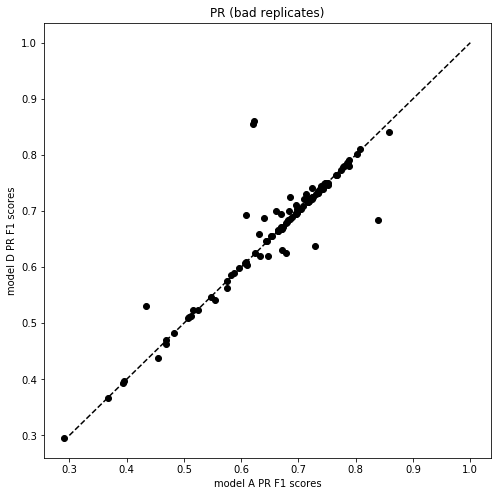

In [46]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelAtable[9].values[PR_DSplus_cut], modelDtable[9].values[modelD_PRcut], 'ok')
plt.xlabel('model A PR F1 scores')
plt.ylabel('model D PR F1 scores')
plt.title('PR (bad replicates)')
plt.plot([0.3,1], [0.3,1], '--k')
plt.show()

In [49]:
np.mean(modelAtable[9].values[PR_DSplus_cut])

0.66467071957113033

In [51]:
np.mean(modelDtable[9].values[modelD_PRcut])

0.66926272663230235

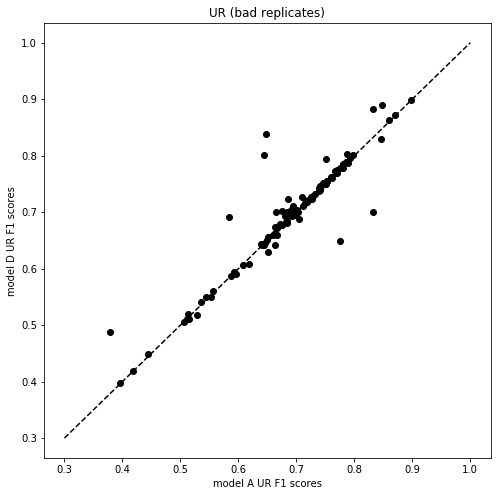

In [48]:
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(modelAtable[9].values[UR_DSplus_cut], modelDtable[9].values[modelD_URcut], 'ok')
plt.xlabel('model A UR F1 scores')
plt.ylabel('model D UR F1 scores')
plt.title('UR (bad replicates)')
plt.plot([0.3,1], [0.3,1], '--k')
plt.show()